<a href="https://colab.research.google.com/github/martindevoto/machine-learning-notebooks-personal/blob/main/Maddison_Project_Database_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import rankdata

## Input data

We will be using the Maddison Project Database from 2020.

The Maddison Project, also known as the Maddison Historical Statistics Project, is a project to collate historical economic statistics, such as GDP, GDP per capita, and labor productivity.

It was launched in March 2010 to continue the work of the late economic historian Angus Maddison. The project is under the Groningen Growth and Development Centre at the University of Groningen, which also hosts the Penn World Table, another economic statistics project.

[Wiki](https://en.wikipedia.org/wiki/Maddison_Project)

[Source to download the Maddison Project Database from 2020](https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2020?lang=en)

In [ ]:
df = pd.read_excel(io='/content/MyDrive/My Drive/mpd2020.xlsx', sheet_name=3,
                   header=1, index_col='year')
df = df.loc[1880:]

In [ ]:
df = df.rank(1, ascending=False, method='first')

In [ ]:
df['ARG'].idxmin()

# Esto es para ver el año en el que Argentina tuve el mejor ranking de 
# PBI per capita

1896.0

In [ ]:
df['ARG'].idxmax()
# Esto es para ver el año en el que Argentina tuve el peor ranking de 
# PBI per capita

2018.0

In [ ]:
def plot_country_rank(df, plot_config, years_config, rank_config):
    """Create a rank plot for one or more countries."""
    figsize = plot_config['figsize'] # Height and width of the chart
    title = plot_config['title']

    start_year = years_config['start_year'] 
    end_year = years_config['end_year']
    year_step = years_config['year_step']
    cutoff_year = years_config.get('cutoff_year', None) # Optional: plot a line
    # to show a break
    
    top_rank = rank_config['top_rank']
    low_rank = rank_config['low_rank']
    rank_step = rank_config['rank_step']

    plt.rcParams["figure.figsize"] = figsize
    df.plot(rot=60, title=title,
            fontsize=10, xlim=[start_year, end_year]).invert_yaxis()

    plt.xlabel('Año')
    if cutoff_year is not None:
        plt.axvline(x=cutoff_year,c='r', ls='--', label='1947')    
        plt.text(cutoff_year + 0.3, top_rank + 1, str(cutoff_year), rotation=0,
                 c='r')
    plt.xticks(range(start_year, end_year, year_step))
    plt.yticks(range(top_rank, low_rank, rank_step));


## Argentina

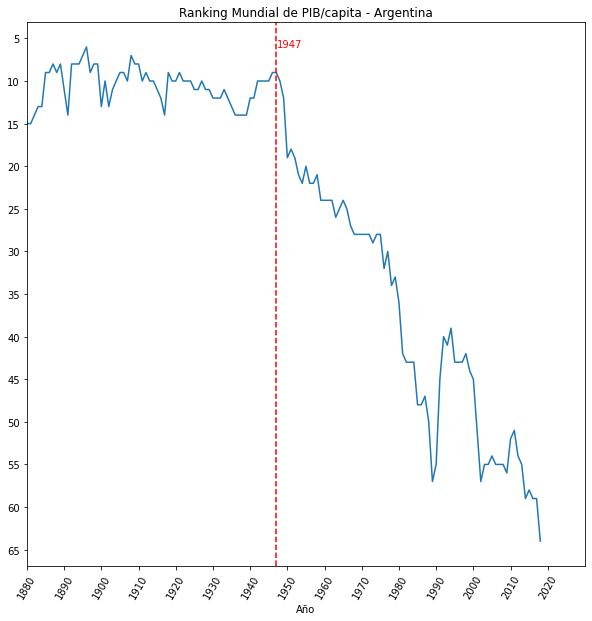

In [ ]:
# Argentina

plot_config = {
    'figsize': (10, 10), # Height and width of the chart
    'title': 'Ranking Mundial de PIB/capita - Argentina'
}

years_config = {
    'start_year': 1880,
    'end_year': 2030,
    'year_step': 10,
    'cutoff_year': 1947 # Optional: plot a line to show a break
}

rank_config = {
    'top_rank': 5,
    'low_rank': 70,
    'rank_step': 5
}

plot_country_rank(df['ARG'], plot_config, years_config, rank_config)

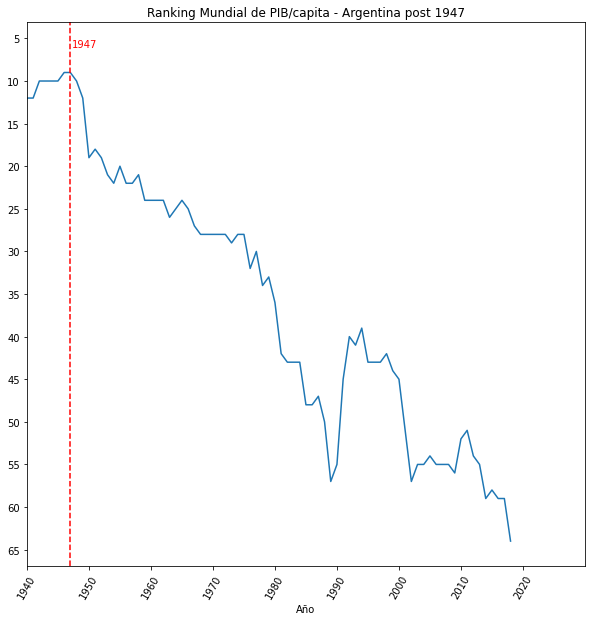

In [ ]:
# Argentina post 1947

plot_config = {
    'figsize': (10, 10),
    'title': 'Ranking Mundial de PIB/capita - Argentina post 1947'
}

years_config = {
    'start_year': 1940,
    'end_year': 2030,
    'year_step': 10,
    'cutoff_year': 1947
}

rank_config = {
    'top_rank': 5,
    'low_rank': 70,
    'rank_step': 5
}

plot_country_rank(df['ARG'], plot_config, years_config, rank_config)

## Countries that may be assumed to have started from "similar" economic conditions

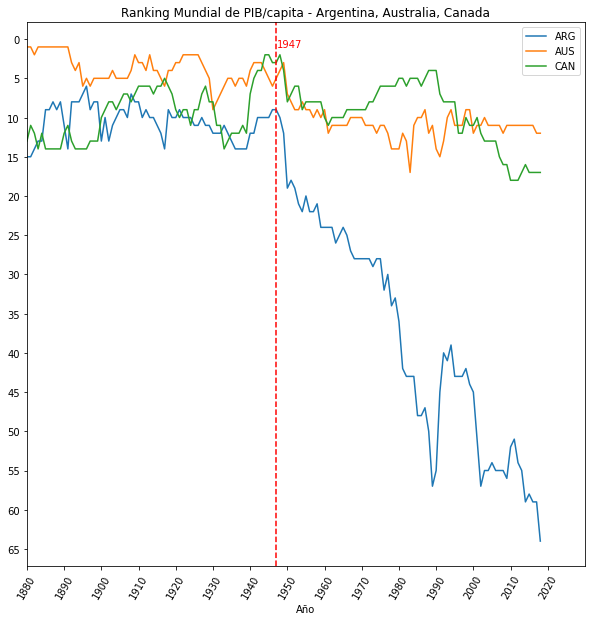

In [ ]:
# Argentina, Australia, Canada

plot_config = {
    'figsize': (10, 10),
    'title': 'Ranking Mundial de PIB/capita - Argentina, Australia, Canada'
}

years_config = {
    'start_year': 1880,
    'end_year': 2030,
    'year_step': 10,
    'cutoff_year': 1947
}

rank_config = {
    'top_rank': 0,
    'low_rank': 70,
    'rank_step': 5
}

plot_country_rank(df[['ARG', 'AUS', 'CAN']], plot_config, years_config, 
                  rank_config)

## Sudamerica

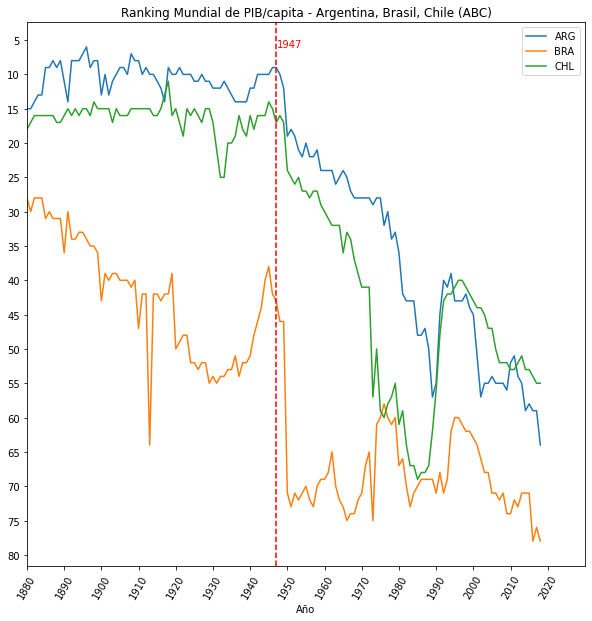

In [ ]:
# Argentina, Brasil, Chile

plot_config = {
    'figsize': (10, 10),
    'title': 'Ranking Mundial de PIB/capita - Argentina, Brasil, Chile (ABC)'
}

years_config = {
    'start_year': 1880,
    'end_year': 2030,
    'year_step': 10,
    'cutoff_year': 1947
}

rank_config = {
    'top_rank': 5,
    'low_rank': 85,
    'rank_step': 5
}

plot_country_rank(df[['ARG', 'BRA', 'CHL']], plot_config, years_config, 
                  rank_config)

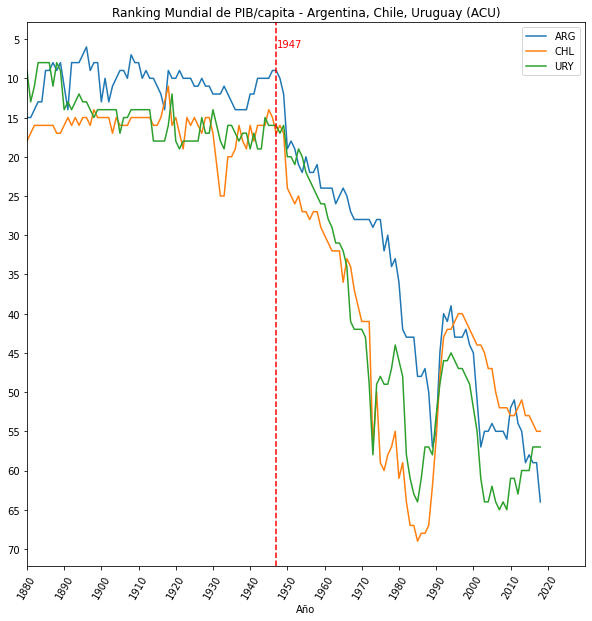

In [ ]:
# Argentina, Chile, Uruguay (ACU)

plot_config = {
    'figsize': (10, 10),
    'title': 'Ranking Mundial de PIB/capita - Argentina, Chile, Uruguay (ACU)'
}

years_config = {
    'start_year': 1880,
    'end_year': 2030,
    'year_step': 10,
    'cutoff_year': 1947
}

rank_config = {
    'top_rank': 5,
    'low_rank': 75,
    'rank_step': 5
}

plot_country_rank(df[['ARG', 'CHL', 'URY']], plot_config, years_config, 
                  rank_config)

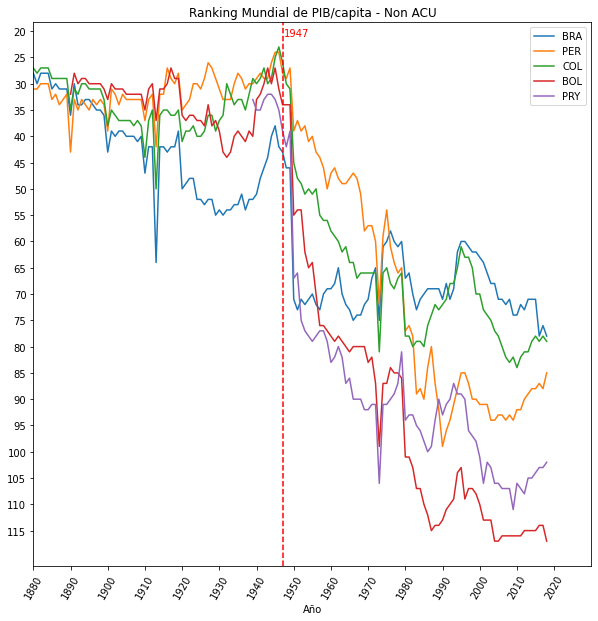

In [ ]:
# NO Argentina, Chile, Uruguay (ACU)

plot_config = {
    'figsize': (10, 10),
    'title': 'Ranking Mundial de PIB/capita - Non ACU'
}

years_config = {
    'start_year': 1880,
    'end_year': 2030,
    'year_step': 10,
    'cutoff_year': 1947
}

rank_config = {
    'top_rank': 20,
    'low_rank': 120,
    'rank_step': 5
}

plot_country_rank(df[['BRA', 'PER', 'COL', 'BOL', 'PRY']], plot_config, years_config, 
                  rank_config)

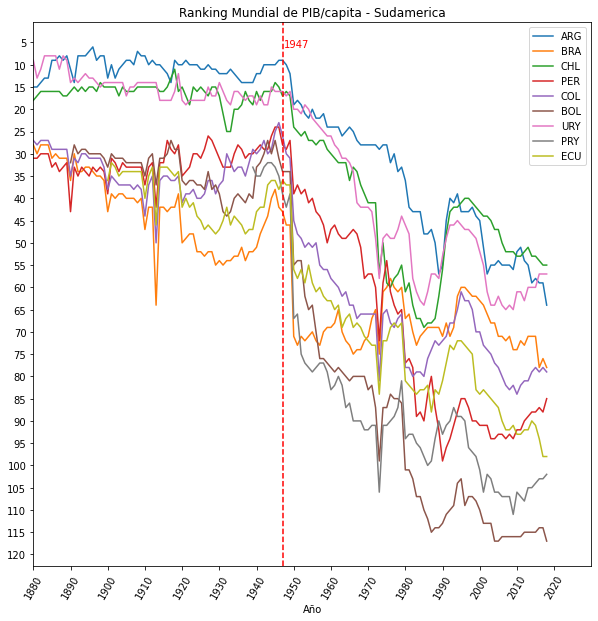

In [ ]:
# Sudamerica (SAm)

plot_config = {
    'figsize': (10, 10),
    'title': 'Ranking Mundial de PIB/capita - Sudamerica'
}

years_config = {
    'start_year': 1880,
    'end_year': 2030,
    'year_step': 10,
    'cutoff_year': 1947
}

rank_config = {
    'top_rank': 5,
    'low_rank': 125,
    'rank_step': 5
}

plot_country_rank(df[['ARG', 'BRA', 'CHL', 'PER', 'COL', 'BOL', 'URY', 'PRY', 
                      'ECU']], plot_config, years_config, rank_config)

## LatAm

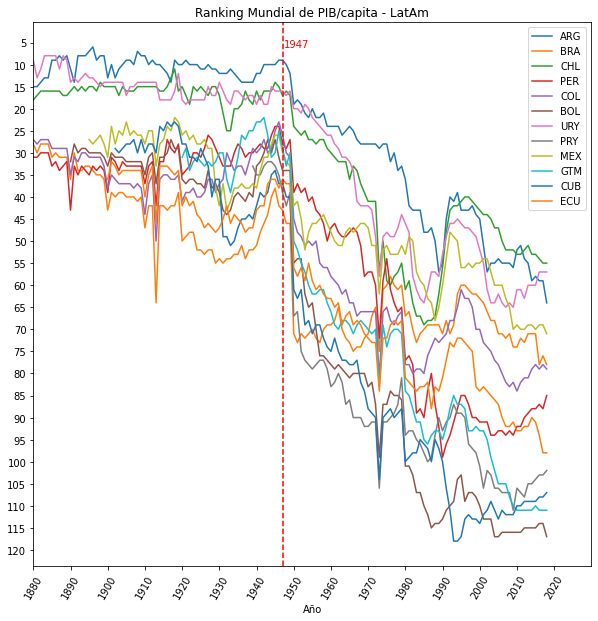

In [ ]:
# LatAm

plot_config = {
    'figsize': (10, 10),
    'title': 'Ranking Mundial de PIB/capita - LatAm'
}

years_config = {
    'start_year': 1880,
    'end_year': 2030,
    'year_step': 10,
    'cutoff_year': 1947
}

rank_config = {
    'top_rank': 5,
    'low_rank': 125,
    'rank_step': 5
}

plot_country_rank(df[['ARG', 'BRA', 'CHL', 'PER',
                      'COL', 'BOL', 'URY', 'PRY',
                      'MEX', 'GTM', 'CUB', 'ECU']], plot_config, years_config, 
                  rank_config)